In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [22]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/9216321995_83df405ea9.jpg


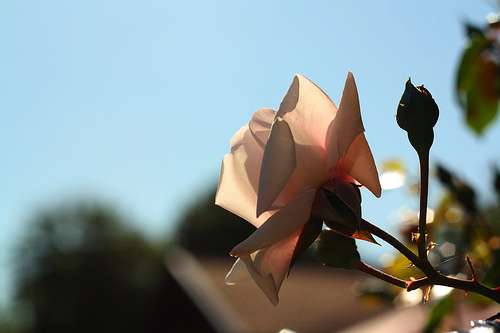

In [23]:

roses = list(data_dir.glob('roses/*'))
print(roses[3])
PIL.Image.open(str(roses[3]))

/root/.keras/datasets/flower_photos/daisy/21626652132_97e1318bb8_m.jpg


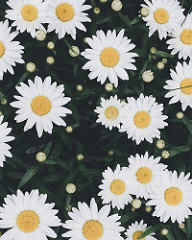

In [24]:
daisy = list(data_dir.glob('daisy/*'))
print(daisy[3])
PIL.Image.open(str(daisy[3]))

In [42]:
tulips = list(data_dir.glob('tuplips/*'))
print(tulips[0])
PIL.Image.open(str(tulips[0]))

IndexError: list index out of range

/root/.keras/datasets/flower_photos/sunflowers/8014735546_3db46bb1fe_n.jpg


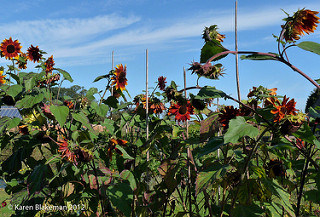

In [26]:
sunflowers = list(data_dir.glob('sunflowers/*'))
print(sunflowers[3])
PIL.Image.open(str(sunflowers[3]))

In [27]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [28]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [29]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


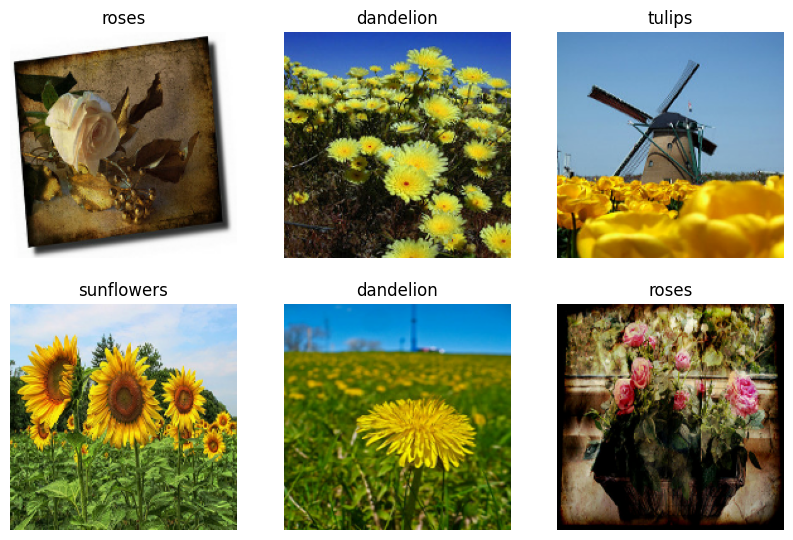

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [32]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_5 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [33]:

resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
92/92 [==============================] - 17s 133ms/step - loss: 0.6532 - accuracy: 0.7864 - val_loss: 0.4035 - val_accuracy: 0.8556
Epoch 2/10
92/92 [==============================] - 10s 108ms/step - loss: 0.2785 - accuracy: 0.9019 - val_loss: 0.3809 - val_accuracy: 0.8638
Epoch 3/10
92/92 [==============================] - 9s 91ms/step - loss: 0.1687 - accuracy: 0.9441 - val_loss: 0.4939 - val_accuracy: 0.8324
Epoch 4/10
92/92 [==============================] - 10s 102ms/step - loss: 0.0921 - accuracy: 0.9724 - val_loss: 0.4227 - val_accuracy: 0.8542
Epoch 5/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.4572 - val_accuracy: 0.8542
Epoch 6/10
92/92 [==============================] - 10s 100ms/step - loss: 0.0508 - accuracy: 0.9850 - val_loss: 0.4064 - val_accuracy: 0.8706
Epoch 7/10
92/92 [==============================] - 9s 91ms/step - loss: 0.0244 - accuracy: 0.9956 - val_loss: 0.4228 - val_accuracy: 0.8787
Epo

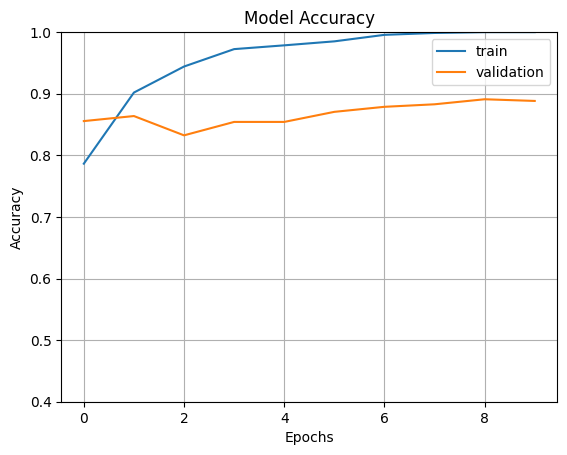

In [35]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

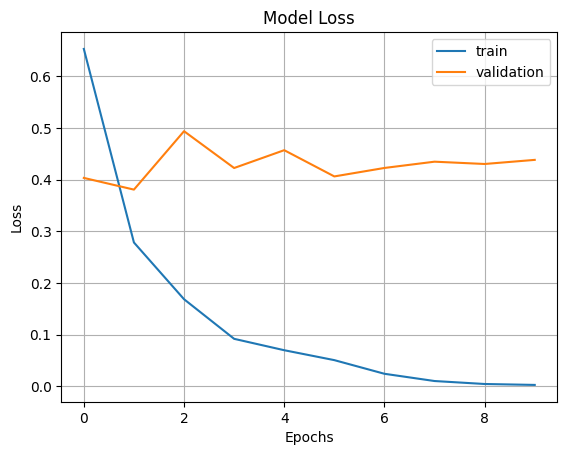

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [65]:
import cv2
image=cv2.imread(str(daisy[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [66]:
pred=resnet_model.predict(image)
print(pred)


1/1 [==============================] - 0s 23ms/step
[[9.9999988e-01 1.8054397e-09 5.8984877e-08 3.4114656e-08 2.7318151e-08]]


/root/.keras/datasets/flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg


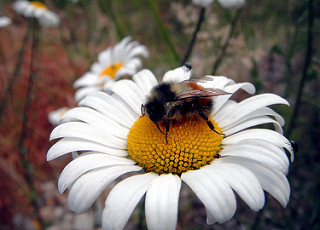

In [67]:
print(daisy[0])
PIL.Image.open(str(daisy[0]))

In [68]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is daisy
